# Assignment 3

Due March 20th at **10am**.  Pre-grading will be posted on CourseSpaces once the script is running.  Please save your assignment notebook in your `mp248` repo as `mp248/Assignment.3/Assignment.3.ipynb`. Please keep all output and data files in that  `mp248/Assignment.3` notebook. Add all files that you are asked to generate to your git commit, except the nuclear data files.

For each plot that you are asked to make create a `.png` image and add it to your commit. Put the problem number and sub-number in the file name, such as `P1.4.png`.

Problem 1 leans heavily on material done in Course Notebook 11 and Lab 11.a and 11.b. In the week March 11 -15 we will provide all the usual help in the labs regarding questions concerning Lab 11.a and 11.b and  Course Notebook 11. However, in the lab March 18th we will not be answering any questions concerning those labs or the assignment to treat students in the Monday and Wednesday lab the same. 

As a tip, it is strongly recommended to completely finish the labs 11.a and 11.b, as this will be of great help. 

## 1 Temperature-dependent network solution

The goal of this problem is to extend the network solution from Course Notebook 11 to allow the network integration to follow a time-dependent temperature evolution (trajectory). Different T mean different rates in the RHS. 

#### 1.1 Network with constant rates
- Collect the **essential** code components that are required to solve the nuclear network as described in Course Notbook 11, using the `integrate.odeint`, using the rates for $T9=0.09$, ~~[rho]~~* and initial abundances as in the course notebook. 
- Make a plot of the evolution of the mass fractions (`Y*A`) as a function of time in the time interval `[0,1.e6]`s. Make sure all lines have different linestyle and color, as well as a legend. 
- Open a  new file called `results.txt` using `open` (check the docstring for the right `mode` option) and write the mass fraction of $^{15}N$ (`n15`) at $t=10,000s$  and $10^6$ in the first two lines of the file, at the end of a formatted statement which each say: `The N15 abundance at t=xxx is: ...` (replace the three dots `...` with the mass fraction value and `xxx` with time in s). 

*: Removed in lecture, our solution does not depend on the density anymore.

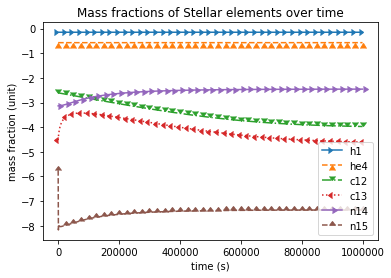

In [77]:
## Question 1 Part 1:

########## n15 abundance wrong for 1###############

import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import lines
from matplotlib.lines import lineStyles as linestyle
linestyle=list(linestyle.keys())
# print(linestyle)
f_ini=open('./iniab1.4E-02As09.ppn')
ind=[];elem=[];A=[];X=[]   # we will sort the row items into these three lists
for i,line in enumerate(f_ini.readlines()):
    a,b,c,d=line.split()
    # the first column in the file contains the charge
    ind.append(i)  # number; we don't need it, but an index variable
    elem.append(b) # would be useful
    A.append(c)
    X.append(d)
f_ini.close()
# intial conditions in right units (molar fractions):
X0=np.array(X,float)
A=np.array(A,float)
Y0 = X0/A

global rate

rate=[7.36E-06]       # C12(p,g)
rate.append(3.52E-05) # C13(p,g)
rate.append(2.36E-07) # N14(p,g)
rate.append(2.03E-02) # N15(p,a)

rate = np.array(rate)
def react_terms(y):
    terms=[]
    terms.append(rate[0]*y[2]*y[0]) # 0 C12(p,g)
    terms.append(rate[1]*y[3]*y[0]) # 1 C13(p,g)
    terms.append(rate[2]*y[4]*y[0]) # 2 N14(p,g)
    terms.append(rate[3]*y[5]*y[0]) # 3 N15(p,a)
    return np.array(terms)
def f_rhs(y,t):
    '''Provide RHS for CN network equations'''

    terms = react_terms(y)

    dh1_dt  =  -terms.sum()
    dhe4_dt =   terms[3]
    dc12_dt =  -terms[0] + terms[3]
    dc13_dt =  -terms[1] + terms[0]
    dn14_dt =  -terms[2] + terms[1]
    dn15_dt =  -terms[3] + terms[2]

    return np.array([dh1_dt,dhe4_dt,dc12_dt,dc13_dt,dn14_dt,dn15_dt])
terms = react_terms(Y0)
terms[0], rate[0], Y0[0], Y0[2]

dt        = 1.
t         = np.arange(0, 10**6+1 ,dt)
markevery = 25000
Y=integrate.odeint(f_rhs,Y0,t)
plt.close(2);plt.figure(2)
for i in ind:
    plt.plot(t,np.log10(Y.T[i]*A[i]),label=elem[i]+str(int(A[i])),linestyle=linestyle[np.mod(i,4)],marker=i+5,markevery=markevery)
plt.legend(loc=4)
plt.ylabel('mass fraction (unit)');plt.xlabel('time (s)')
plt.title("Mass fractions of Stellar elements over time")
plt.savefig("Q1P1.png")
f=open("results.txt","w")
# for e,m in zip(elem,A):
TIME=[10**4,10**6]
f.write("The %s abundance at t=%8.0f is: %g"%(str(str(elem[-1])+str(int(A[-1]))),TIME[0],Y[-1][0]*A[-1]))
f.write("\nThe %s abundance at t=%8.0f is: %g"%(str(elem[-1])+str(int(A[-1])),TIME[1],Y[-1][-1]*A[-1]))
# f.write("\n"+"This is a text")
f.close()
# ## End Q1P1

In [63]:
A[-1]

15.0

#### 1.2 Trajectory file
- Read file `T-evol.dat` using numpy's `loadtxt` method and combine all data read from the file into one dictionary `traj_data`, so that you can access it like this: `traj_data['T9']` and likewise for key `'time'`. 
- Plot temperature as a function of time. Use log scale when appropriate. 
- Using python commands (don't copy and paste!) open again the file `results.txt` (assuming you have closed it previously) and add as the third line the first values of time and temperature contained in the file `T-evol.dat` using the dictionary `traj_data`. Again, check the docstring of the `write` method what `mode=` option is needed to append, and recall that the sting `'\n'` is interpreted as a newline. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


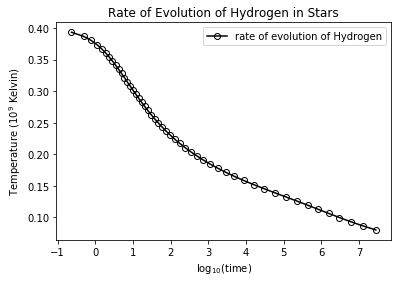

In [78]:
## Question 1 part 2
import numpy as np
import matplotlib.pyplot as plt

traj_data={}
dat=np.loadtxt("T-evol.dat").T # transposing data to get two individual columns for data

traj_data["time"]=dat[0] # keys and rates for dictionary
traj_data["T9"]=dat[1]   # key and temp for dictionary

plt.plot(np.log10(traj_data["time"]),traj_data["T9"],"k-o",fillstyle="none",label="rate of evolution of Hydrogen")
plt.legend()

plt.title("Rate of Evolution of Hydrogen in Stars")
plt.xlabel("$\log_{10}$(time)")
plt.ylabel("Temperature ($10^9$ Kelvin)")
plt.savefig("Q1P2.png")
plt.show()


f=open("results.txt","a")
f.write("\n"+str(traj_data['time'][0]) + " " + str(traj_data['T9'][0]))
f.close()

#### 1.3 Trajectory interpolation
For the integration we need the temperature at any time the solver decides to request. 
- Use scipy's `interpolate.interp1d` to set up an interpolation function called `T9int`  for `T9` that returns for any time within the limits of the trajectory the  temperature ~~[and density]~~*, using the linear interpolation option. Make sure your interpolation function has the extrapolation option turned on.
- Add the output of that function for `t=1.5e+4` and `t=2.9e+7` to the file `results.txt`. 
    
*: Removed in lecture, our solutions do not depend on rho anymore

In [73]:
## Question 1 Part 3
import numpy as np
import scipy.interpolate as interpolate

traj_data={}
dat=np.loadtxt("T-evol.dat").T # transposing data to get two individual columns for data

traj_data["time"]=dat[0] # keys and rates for dictionary
traj_data["T9"]=dat[1]   # key and temp for dictionary

T9int=interpolate.interp1d(traj_data["time"],traj_data["T9"],fill_value='extrapolate')

f=open("results.txt","a")
f.write("\n"+str(T9int(1.5E4))+" "+str(T9int(2.9E7)))
f.close()
print(T9int(1.5E4))
print(T9int(2.9E7))

############## Write the data to the file mentioned above ################
## End Q1P3

0.15267404863009065
0.07951074868257373


#### 1.4 Nuclear data `get_rates` function
- Collect the essential code from Lab 11.a that reads the T-dependent reaction rate data and provides the function `get_rates()` to provide for a given input temperature the `rate` list required in the solution above. Be careful what unit the temperature is in. In the trajectory, as indicated in the header, the unit is plain Kelvin, but in the reaction rate files it is in units of $10^9$K, also referred to as `T9`. 
- Write the output of `str(get_rates(traj_data['T9'][0]))` as another line to the `results.txt` file. 

In [74]:
## Queston 1 part 4

import urllib
import numpy as np
import scipy.interpolate as interpolate

def data_aq():
    files=["12cpg13n.dat","13cpg14n.dat","14npg15o.dat","15npa12c.dat"]
    paths=[]
    for c in files:
        f=urllib.request.urlretrieve("http://www.astro.ulb.ac.be/nacreii/data/"+"%s"%c)
        paths.append(f[0])
    return paths

def get_rates(Temperature):
    paths=data_aq();    interps=[];    rates=[]
    for path in paths:
        f=np.loadtxt(path).T
        x=f[0];        y=f[1]
        y=interpolate.interp1d(x,y,fill_value='extrapolate')
        interps.append(y)
    for i in interps:
        rates.append(i(Temperature))
    return np.array(rates,"str")
rate = get_rates(traj_data["T9"][0])
print(" ".join(rate))
f=open("results.txt","a")
f.write('\n'+" ".join(rate))
# for e in rate:    
#     f.write(str(e)+" ")
f.close()



## End Q1P4

3.18 5.97 4.77 45800.0


#### 1.5 Time-dependent temperature network solution
We now have the temperature evolution in function `T9int(time)` and we can get the list `rate` for any temperature. Therefore we can get the rates as a function of time when calculating the RHS. Therefore we will actually use the previously ignored time arguments `t` in `f_rhs(y,t)`. 
- Identify the code cell from part 1 of this problem that needs to be changed to allow a solution for variable `T9` and therefore variable `rate`. Copy that cell below, and make the required changes. 
- Use again `odeint` to solve the network ODE for time-dependent rates, making the necessary change to the function call.
- Plot all abundances in terms of mass fractions for the time-dependent rates solution.
- Add the final abundance of all species in one row as the last line to the `results.txt`.
- Bonus question: You may find that some abundances are showing erratic behaviour that you may suspect to be the result of lack of accuracy during that particular time of the integration. Study the docstring of the `odeint` method and identify a remedy for this problem, implement it and show the resulting improvement. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in log10


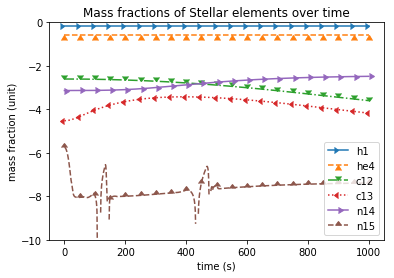

<Figure size 432x288 with 0 Axes>

In [75]:
## Question 1 Part 5:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import lines
from matplotlib.lines import lineStyles as linestyle
linestyle=list(linestyle.keys())


f_ini=open('./iniab1.4E-02As09.ppn')
ind=[];elem=[];A=[];X=[]   # we will sort the row items into these three lists

for i,line in enumerate(f_ini.readlines()):
    a,b,c,d=line.split()
    # the first column in the file contains the charge
    ind.append(i)  # number; we don't need it, but an index variable
    elem.append(b) # would be useful
    A.append(c)
    X.append(d)
f_ini.close()


# intial conditions in right units (molar fractions):
X0=np.array(X,float)
A=np.array(A,float)
Y0 = X0/A

rate=[7.36E-06];rate.append(3.52E-05);rate.append(2.36E-07);rate.append(2.03E-02)
rate = np.array(rate)

def react_terms(y):
    terms=[]
    terms.append(rate[0]*y[2]*y[0]) # 0 C12(p,g)
    terms.append(rate[1]*y[3]*y[0]) # 1 C13(p,g)
    terms.append(rate[2]*y[4]*y[0]) # 2 N14(p,g)
    terms.append(rate[3]*y[5]*y[0]) # 3 N15(p,a)
    return np.array(terms)

############# Change f_rhs(y,t) #############
def f_rhs(y,t):
    '''Provide RHS for CN network equations''' 
    terms = react_terms(y)

    dh1_dt  =  (-terms.sum())*t
    dhe4_dt =  (terms[3])*t
    dc12_dt =  (-terms[0] + terms[3])*t
    dc13_dt =  (-terms[1] + terms[0])*t
    dn14_dt =  (-terms[2] + terms[1])*t
    dn15_dt =  (-terms[3] + terms[2])*t
    
    
    return np.array([dh1_dt,dhe4_dt,dc12_dt,dc13_dt,dn14_dt,dn15_dt])
############# rates are dependent on time ########

terms = react_terms(Y0)

dt        = 1
t         = np.arange(0, 10**3+1 ,dt)
markevery = 50


Y=integrate.odeint(f_rhs,Y0,t)
# print(Y)


plt.close(2);plt.figure(2)
for i in ind:
    plt.plot(t,np.log10(Y.T[i]*A[i]),label=elem[i]+str(int(A[i])),linestyle=linestyle[np.mod(i,4)],marker=i+5,markevery=markevery)
plt.legend(loc=4)
plt.ylabel('mass fraction (unit)');plt.xlabel('time (s)')
plt.title("Mass fractions of Stellar elements over time")
plt.ylim((-10,0))
plt.show()
plt.savefig("Q1P5.png")
f=open("results.txt","a")
st=" ".join(list(np.array(Y[-1],dtype="str")))
f.write("\n"+st)
f.close()

## 2 Higher-order derivative

In course notebook 5 we introduced a first-order accurate numerical derivative. Review that course notebook material.
It is very easy to increase the order of the difference equation to second order, and thereby improve the accuracy. The idea is to take into account one more term of the Taylor expansion, then solve again for $f^\prime(x)$ as shown below:

$$
f(x+h) = f(x) + hf^\prime(x) + \frac{1}{2}h^2f^{\prime\prime}(x)
$$
 and solve for $f^\prime(x)$ 
$$
f^\prime(x)  = \frac{f(x+h) - f(x)}{h}  - \frac{1}{2}hf^{\prime\prime}(x) 
$$

with the second order derivative being approximated to first order by
$$
f^{\prime\prime}(x) \approx \frac{f'(x+h) -f'(x)}{h}
$$

* Implement a function `deriv2` which takes the same arguments as `deriv1` introduced in notebook 5, but implements the first derivative in second-order accurate discretization described above. Test it for the third-order polynomial $f(x) = x^3$ for $x=1$.
* Create a convergence test plot as in Figure 2 in notebook 5 that shows the dependence of the residual `log10 (df/dx - 3.0)` as a function of `log10(h)` where `h = 10**npow` and `npow=[0, -1, ..., -10]` for both the first-order and second-order accurate functions `derv1` and `deriv2`.

Finally, add to the `results.txt` file the line 

`Residual first- and second-order for npow=-2: ...` 

replacing the dots `...` with the two numbers at that value of h for both derivatives.

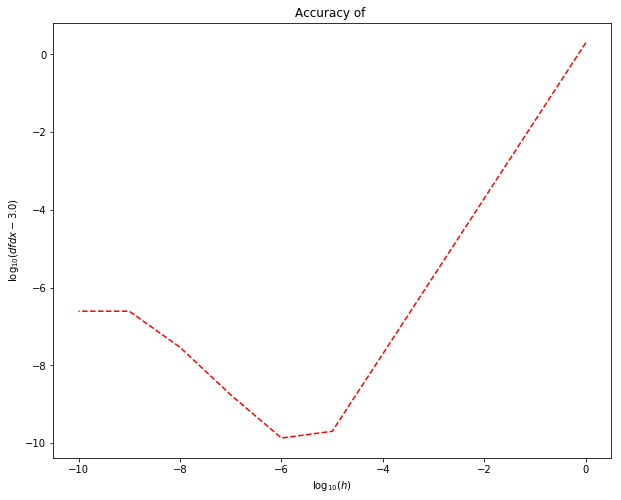

<Figure size 432x288 with 0 Axes>

In [76]:
def deriv1(f,x,h):
    '''
    f: a sympy callable function
    x: initial x position
    h: variance between x positions (delta x)
    '''
    dfdx = (f(x+h) - f(x)) / h
    return dfdx
def deriv2(fp,x,h):
    '''
    fp: a sympy callable function
    x: initial x position
    h: variance between x positions (delta x)
    '''
    d2fdx2 = ( deriv1(fp,x+h,h) - deriv1(fp,x,h) ) / h
    return d2fdx2
def deriv1_2(f,x,h):
    dfdx = deriv1(f,x,h) - ( 0.5 * h * deriv2(f,x,h) )
    return dfdx
import sympy as sp
from sympy import lambdify,Symbol
import matplotlib.pyplot as plt

x=Symbol("x");f=x**3;f=lambdify(x,f)

x0=1
# npow = np.linspace(0,-20,100)
npow=range(0,-11,-1)
h_pow=[10**i for i in npow]



XX=np.log10(h_pow)
# print(XX)
y1=[abs(deriv1_2(f,x0,i) - 3.0) for i in h_pow]
# print(y1)
YY=np.log10(y1)

# YY=[np.log10((deriv1_2(f,x,i) - 3.0) for i in h_pow)]
plt.figure(figsize=(10,8))
plt.plot(npow,YY,"r--")
plt.xlabel("$\log_{10}(h)$")
plt.gca().invert_xaxis
plt.ylabel(" $\log_{10}(dfdx-3.0) $ ")
plt.title("Accuracy of ")
plt.show()
plt.savefig("Q2P1.png")


one=abs(deriv1(f,x0,h_pow[2])-3.0)
two=abs(deriv2(f,x0,h_pow[2])-6.0)

########### Writing data to the file ###############

f=open("results.txt",'a')
# stringy=
f.write("\nResidual first- and second-order for npow=-2: %f %f" %(one , two))
f.close()